In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### With sampling, we treat the dataset as the population and move to a smaller sample. With bootstrapping, we treat the dataset as a sample and use it to build up a theoretical population.

### Sampling

In [2]:
df_samp = pd.read_csv('taiwan_real_estate.csv')

In [3]:
df_samp['house_age_years'].unique()

array(['30 to 45', '15 to 30', '0 to 15'], dtype=object)

In [4]:
df_samp

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


In [5]:
# Getting sample
df_samp_10 = df_samp['price_twd_msq'].sample(n=10)

print(f"Sample mean {np.mean(df_samp_10)}")
print(f"Original mean {np.mean(df_samp['price_twd_msq'])}")

Sample mean 10.850226928895468
Original mean 11.491737741819808


### Random Data

Uniform and Normal Distribution

Uniform - Flat, constant probability across the range - Min (a), Max (b) - Rolling a fair die, picking a random number in [0, 1] - Every outcome is equally likely

Normal - Bell-shaped, symmetric around the mean - Mean (𝜇), Standard deviation (σ) - Heights, test scores, natural phenomena - Most outcomes are around the mean, fewer at extremes

Uniform Distribution


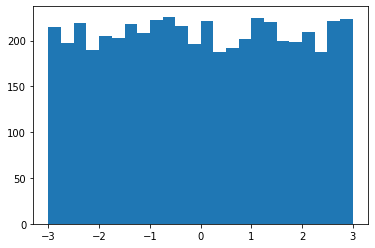

Normal Distribution


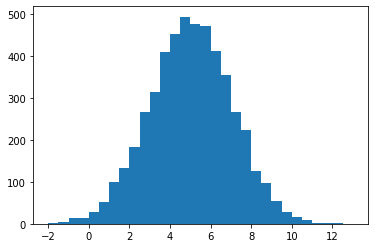

In [6]:
# when you asked if uniform distribution is discrete
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000) # low Lower boundary - high Higher boundary

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000) # loc is the mean and scale is the std

# Plot a histogram of uniform values, binwidth 0.25
print('Uniform Distribution')
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

# Plot a histogram of normal values, binwidth 0.5
print('Normal Distribution')
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

In [7]:
# Seed
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
print(x,y)
print('The values of x are different from those of y')

print()
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)
print(x,y)
print('x and y have identical values')

print()
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)
print(x,y)
print('The values of x are different from those of y')

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025] [ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]
The values of x are different from those of y

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025] [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
x and y have identical values

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025] [-0.6681285  -0.49820952  0.61857582  0.56869225  1.35050948]
The values of x are different from those of y


#### Two types of sampling

Systematic sampling

In [8]:
# Getting a sample with alternative method
sample_size = 5 # Number of rows we want as output
pop_size = len(df_samp) # The total numbers of observations
interval = pop_size // sample_size # The position for each selection
df_samp.iloc[::interval]

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
82,150.93470,7,0 to 15,14.553707
164,185.42960,0,0 to 15,16.701967
246,389.82190,6,15 to 30,12.284418
328,1497.71300,3,15 to 30,7.140696
410,90.45606,9,0 to 15,15.128593


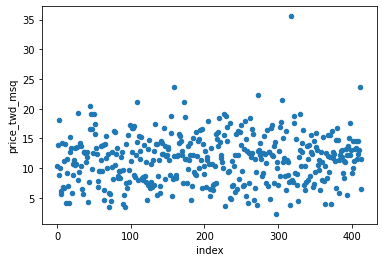

In [9]:
## Systematic sampling is only safe if we don't see a pattern in this scatter plot

# Making systematic sampling safe needs to shuffle the dataset
shuffled = df_samp.sample(frac=1) # How to shuffle the dataset into one dataframe or list using franc = 1 which is get the 100%  of the data
shuffled = shuffled.reset_index(drop=True).reset_index() # reset index
shuffled.plot(x="index", y="price_twd_msq", kind="scatter") # Plotting the see the final output
plt.show()

Stratified sampling

In [10]:
# Simple random sampling of each category

# Sample
df_samp_samp = df_samp.sample(frac=0.1, random_state=2021) # Get the 10% of the dataframe to generate the sample
output_no_cat = df_samp_samp['house_age_years'].value_counts(normalize=True) # Viz the data normalized it

# Sample with groupby
df_samp_strat = df_samp.groupby("house_age_years").sample(frac=0.1, random_state=2021)
output_cat = df_samp_strat['house_age_years'].value_counts(normalize=True)
## Sample with groupby the results is more accurate because it sampling each category separate

print('Sample')
print(output_no_cat)
print('Sample with Cat')
print(output_cat)

print()
print('Sample with groupby the results is more accurate because it sampling each category separate')

Sample
30 to 45    0.414634
0 to 15     0.341463
15 to 30    0.243902
Name: house_age_years, dtype: float64
Sample with Cat
0 to 15     0.452381
15 to 30    0.309524
30 to 45    0.238095
Name: house_age_years, dtype: float64

Sample with groupby the results is more accurate because it sampling each category separate


In [11]:
# Cluster sampling 

# Not Getting all categories just a random categories

# Use simple random sampling to pick some subgroups
# Use simple random sampling on only those subgroups
# We randomly sampled the subgroups to include, then we randomly sampled rows from those subgroups.

df_samp['house_age_years'] = df_samp['house_age_years'].astype('category')

varieties_pop = list(df_samp['house_age_years'].unique()) # The categories
import random
# Stage 1: sampling for subgroups
varieties_samp = random.sample(varieties_pop, k=2) # Get random 3 categories
# Stage 2: sampling each group
variety_condition = df_samp['house_age_years'].isin(varieties_samp) # get the categories we looking for

df_samp_cluster = df_samp.copy()

df_samp_cluster = df_samp_cluster[variety_condition] # Retrieve the dataset with the categories we desired
df_samp_cluster['house_age_years'] = df_samp_cluster['house_age_years'].cat.remove_unused_categories() # Remove unused categories
df_samp_cluster.groupby("house_age_years").sample(n=5, random_state=2021) # Get randomly 5 picks of each category

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
269,837.72330,0,15 to 30,6.959153
370,289.32480,5,15 to 30,12.738275
17,350.85150,1,15 to 30,11.316188
294,335.52730,6,15 to 30,11.527988
369,2185.12800,3,15 to 30,6.898638
0,84.87882,10,30 to 45,11.467474
149,179.45380,8,30 to 45,12.012103
220,186.51010,9,30 to 45,23.691377
390,377.83020,9,30 to 45,11.679274
68,464.22300,6,30 to 45,10.953101


### How good is the sample size you decided to work with - checking the relative error

In [12]:
sample_size = 100
# Population parameter:
population_mean = df_samp['price_twd_msq'].mean()
# Point estimate:
sample_mean = df_samp.sample(n=sample_size)['price_twd_msq'].mean()
# Relative error as a percentage:
rel_error_pct = 100 * abs(population_mean-sample_mean) / population_mean
print(rel_error_pct)

3.4223279359951366


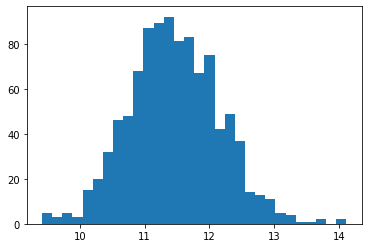

In [13]:
# Getting a sample of 30 records from a dataset.
# What is the most accurate sample if i collect  times the sample of 30 records
df_samp_1000 = []
for i in range(1000):
    df_samp_1000.append(
        df_samp.sample(n=30)['price_twd_msq'].mean() # Collect 1000 samples with 30 observations of each one, and get the mean of each sample
      )
# print(df_samp_1000)
# Plot the means 
import matplotlib.pyplot as plt
plt.hist(df_samp_1000, bins=30)
plt.show()
## More accuracy with more collection 

### Boostraping

In [14]:
df_boost = pd.read_csv('student_performance.csv')

In [15]:
df_boost

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


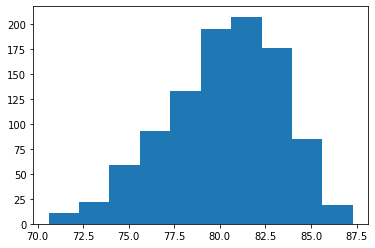

In [16]:
# Sampling with replacement is sometimes called resampling. Bootstrap
df_boost_resamp = df_boost.sample(frac=1, replace=True)

df_boost_1000 = []

for i in range(1000):
    df_boost_1000.append(
    np.mean(df_boost.sample(frac=1, replace=True)['FinalGrade']) 
  )


plt.hist(df_boost_1000)
plt.show()


In [17]:
# Comparing sampling and bootstrap distributions, using standard deviation
# Sample mean:
sample_mean = df_boost['FinalGrade'].mean()

# Estimated population mean:
boost_mean = np.mean(df_boost_1000)

# True population mean:
df_mean = df_boost_resamp['FinalGrade'].mean()

print('Sample mean ' + str(sample_mean))
print('Boostrap mean ' + str(boost_mean))
print('Original mean ' + str(df_mean))
print('Notice the Boostrap mean is closeest to the original mean')

Sample mean 80.2
Boostrap mean 80.2073
Original mean 75.8
Notice the Boostrap mean is closeest to the original mean


#### Confidence Intervals

In [18]:
# Calcualte 2 the Confident Interval
# Lower Confident Interval
print('Lower Confident Interval')
print(np.quantile(df_boost_resamp['FinalGrade'], 0.025))

# Higher Confident Interval
print('Higher Confident Interval')
print(np.quantile(df_boost_resamp['FinalGrade'], 0.975))


Lower Confident Interval
62.0
Higher Confident Interval
90.0


---
Standard deviation of the Sample / Boostrap / Original

Standard Deviation of Boostrap sample is the standard error

In [ ]:
# Standard error of estimated population
# Sample standard deviation:
coffee_sample['flavor'].std()
0.3540883911928703

# True standard deviation:
df_boost['flavor'].std(ddof=0)
0.34125481224622645

# Estimated population standard deviation:
standard_error = np.std(bootstrap_distn, ddof=1)
# Standard error is the standard deviation of the statistic of interest
standard_error * np.sqrt(500)
0.3525938058821761
## Standard error times square root of sample size estimates the population standard deviation